In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Reading the data from the url
data_url = 'http://bit.ly/w-data'
missing_values = ["n/a", "na", "-"]
data = pd.read_csv(data_url, na_values = missing_values)

In [3]:
#Taking a glimpse at the data
data.head(20)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking the data for any missing values
print("Are there any null values:", data.isnull().values.any())
print("Are there any Na values:", data.isna().values.any())
print("Number of missing values:", data.isna().sum() + data.isnull().sum())

Are there any null values: False
Are there any Na values: False
Number of missing values: Hours     0
Scores    0
dtype: int64


In [5]:
# Since we dont have any sort of missing values,
# we can start with building our regression model and not worry about tackling the missing values.

In [6]:
#First lets make sure that the two variables are co-related. This can be done by either on of the following,
# 1. Using the corr() method to get the corelation coefficient.
# 2. Ploting the data.

In [7]:
# Using the corr() method
print(data.corr())

# We can see the corelation between Hours and Scores in 0.976 
# which tells us that the two variable have a strong positive corelation.

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


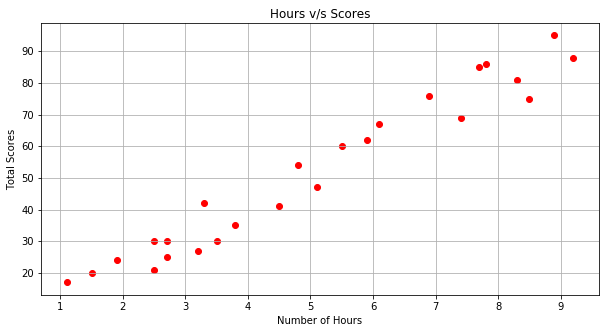

In [28]:
# Plotting the data using the matplotlib library
plt.figure(figsize=(10, 5))
plt.scatter(x = data['Hours'], y = data['Scores'], marker='o', c='red')
plt.title('Hours v/s Scores')
plt.xlabel('Number of Hours')
plt.ylabel('Total Scores')
plt.grid(True)
plt.show()

In [9]:
# Reshaping the variable arrays
x = data.Hours.values.reshape(-1, 1)
y = data.Scores.values.reshape(-1, 1)

In [10]:
# Using the sklearn library to build a linear regression model
reg = linear_model.LinearRegression()

In [11]:
# Splitting the data into training and testing data using the train_test_split method from sklearn library
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.23, random_state = 0)

In [12]:
# Training the model
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
reg.coef_

array([[9.85223213]])

In [14]:
reg.intercept_

array([2.57497659])

In [15]:
# Predicting the scores using our linear regression model
predicted_scores = reg.predict(y)
predicted_scores = predicted_scores/10
print(predicted_scores)

[[20.94718513]
 [46.56298866]
 [26.8585244 ]
 [74.14923861]
 [29.81419404]
 [19.96196191]
 [86.95714038]
 [59.37089042]
 [80.06057789]
 [24.88807798]
 [84.00147074]
 [61.34133685]
 [40.65164938]
 [41.63687259]
 [17.00629228]
 [93.85370287]
 [29.81419404]
 [23.90285476]
 [66.26745291]
 [68.23789934]
 [29.81419404]
 [53.45955115]
 [34.7403101 ]
 [75.13446183]
 [84.98669395]]


In [98]:
# Reconstructing the data frame and adding the predicted score column.
pd.DataFrame(np.c_[data,predicted_scores], columns=['Hours','Scores','Predicted'])

,Hours,Scores,Predicted
0,2.5,21.0,20.947185
1,5.1,47.0,46.562989
2,3.2,27.0,26.858524
3,8.5,75.0,74.149239
4,3.5,30.0,29.814194
5,1.5,20.0,19.961962
6,9.2,88.0,86.957140
7,5.5,60.0,59.370890
8,8.3,81.0,80.060578
9,2.7,25.0,24.888078


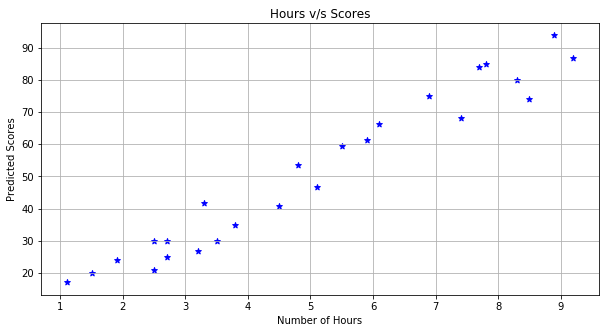

In [71]:
# Plotting the Hours v/s Predicted scores graph
plt.figure(figsize=(10, 5))
plt.scatter(x = data['Hours'], y = predicted_scores, marker='*', c='blue')
plt.title('Hours v/s Predicted Scores')
plt.xlabel('Number of Hours')
plt.ylabel('Predicted Scores')
plt.grid(True)
plt.show()

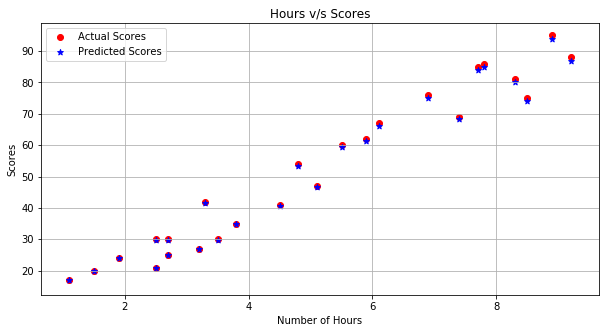

In [72]:
# Plotting the Actual Scores and Predicted scores inorder to compare them.
plt.figure(figsize=(10, 5))
ax1 = plt.scatter(x=data.Hours, y=data.Scores, marker='o', color='r', label='Actual Scores')    
ax2 = plt.scatter(x=data.Hours, y=predicted_scores, marker='*', color='b', label='Predicted Scores')
plt.title('Hours v/s Scores')
plt.xlabel('Number of Hours')
plt.ylabel('Scores')
plt.legend()
plt.grid(True)

In [ ]:
# With all the above plots we can be sure that our model preforms good at predicting the scores
# and thus can be used to predict the scores for 9.25 hours of studying.
# Therefore, we will plugin the number for out model into the equation y = mx + c
# where 'm' is the regression coefficient and 'c' is the regression intercept.

In [93]:
# Plugging in the values.
ans = reg.coef_ * 9.25 + reg.intercept_
ans = np.array2string(ans, precision=3)
print('The predicted score if a student studies for 9.25 hours in a day is:', ans)

The predicted score if a student studies for 9.25 hours in a day is: [[93.708]]
